<a href="https://colab.research.google.com/github/osergioribeirof/Python/blob/main/BCB%20-%20Dados%20Econo%CC%82micos%20do%20Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIBLIOTECA

In [55]:
!pip install python-bcb

In [56]:
from bcb import sgs
import pandas as pd
import matplotlib.pyplot as plt


In [61]:
pip install mplcyberpunk

Note: you may need to restart the kernel to use updated packages.


In [72]:
pip install python-bcb

Note: you may need to restart the kernel to use updated packages.


In [69]:
import matplotlib as mpl 
import mplcyberpunk
from bcb import currency
from bcb import sgs 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from matplotlib.dates import date2num
import mplcyberpunk
from datetime import datetime 
from datetime import timedelta

In [73]:
selic = sgs.get({'selic':432}, start = '2010-01-01')

selic

Exception: Download error: code = 432

NameError: name 'selic' is not defined

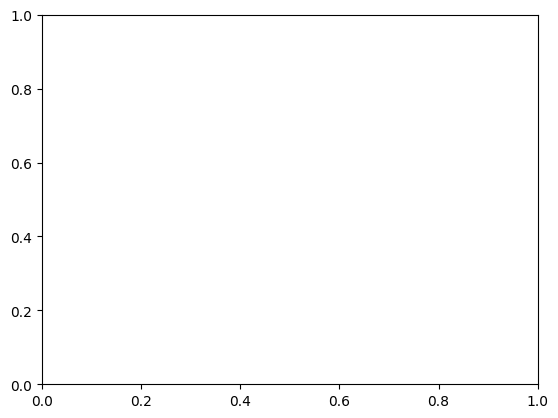

In [66]:
fig, ax = plt.subplots()

plt.style.use("cyberpunk")


ax.plot(selic.index,selic['selic'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(False)
plt.savefig('selic.png', dpi = 300)

plt.show()

# EXEMPLO QUE FUNCIONA

In [57]:
def volumeservicos(codigo, data_inicio, data_fim):
  url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json&dataInicial={}&dataFinal={}'.format(codigo, data_inicio, data_fim)
  df = pd.read_json(url)
  df.set_index('data', inplace = True)
  df.index = pd.to_datetime(df.index, dayfirst= True)
  return df

In [50]:
volumeservicos(21637,'01/01/2010', '01/03/2025')

,valor
data,
2011-01-01,52.29
2011-02-01,52.27
2011-03-01,55.88
2011-04-01,55.37
2011-05-01,57.29
...,...
2024-08-01,117.57
2024-09-01,117.50
2024-10-01,120.38


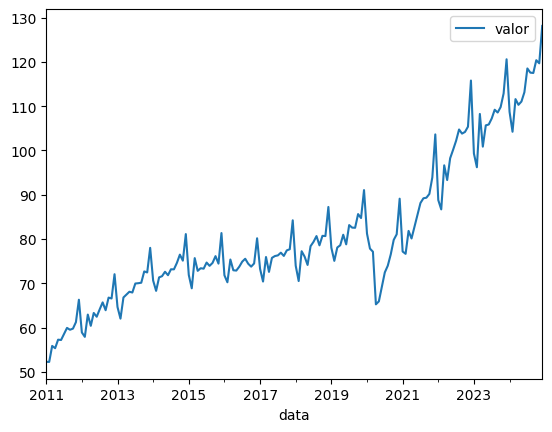

In [51]:
volumeservicos(21637,'01/01/2010', '01/02/2025').plot();

# **ATIVIDADE**

# VOLUME SERVIÇOS

### Volume Serviços

In [59]:
VolumeServices = sgs.get(23982) #Monthly % var.


Exception: Download error: code = 23982

In [60]:
import plotly.express as px


fig = px.line(VolumeServices, x=VolumeServices.index, y=VolumeServices.iloc[:, 0], title='Volume Services Monthly % var.')

fig.update_xaxes(range=['2011-01-01', VolumeServices.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()



NameError: name 'VolumeServices' is not defined

### Volume Serviços MoM

In [ ]:
import plotly.express as px
import pandas as pd

# Calculate MoM percentage change
VolumeServices_MoM = VolumeServices.iloc[:, 0].pct_change() * 100

# Create a DataFrame for plotting
mom_data = pd.DataFrame({'MoM Change (%)': VolumeServices_MoM}, index=VolumeServices.index)

fig = px.bar(mom_data, x=mom_data.index, y='MoM Change (%)', title='Volume Services MoM (%)')

# Add percentage values as text annotations
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

# Set start date (replace '2020-01-01' with your desired start date)
fig.update_xaxes(range=['2022-01-01', mom_data.index.max()])

fig.show()

NameError: name 'VolumeServices' is not defined

# VOLUME NOMINAL SERVIÇOS

In [11]:
VolumeNominal = sgs.get(21637) #Monthly % var.

Exception: Download error: code = 21637

In [10]:
import plotly.express as px


fig = px.line(VolumeNominal, x=VolumeNominal.index, y=VolumeNominal.iloc[:, 0], title='Volume Nominal Monthly % var.')

fig.update_xaxes(range=['2011-01-01', VolumeNominal.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

NameError: name 'VolumeNominal' is not defined

# VOLUME SERVIÇOS E VOLUME NOMINAL SERVIÇOS

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming 'VolumeServices' and 'VolumeNominal' are pandas DataFrames with a datetime index
# Create a combined DataFrame for plotting
combined_data = pd.DataFrame({
    'VolumeServices': VolumeServices.iloc[:, 0],  # Access the values of the first column
    'VolumeNominal': VolumeNominal.iloc[:, 0]    # Access the values of the first column
}, index=VolumeServices.index)  # Use the index from VolumeServices

fig = px.line(combined_data, x=combined_data.index, y=['VolumeServices', 'VolumeNominal'], title='Volume Services and Volume Nominal')

# Update line colors
fig.update_traces(selector=dict(name='VolumeServices'), line_color='#00008B')  # Dark blue for VolumeServices
fig.update_traces(selector=dict(name='VolumeNominal'), line_color='#FF8C00')  # Dark orange for VolumeNominal

# Set start date (replace '2020-01-01' with your desired start date)
fig.update_xaxes(range=['2011-01-01', combined_data.index.max()])

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# PRODUÇÃO INDUSTRIAL DESSAZONALIZADO

### Produção Industrial Dessazonalizado

In [10]:
PID = sgs.get(28503) #Monthly % var.

Exception: Download error: code = 28503

In [ ]:
import plotly.express as px


fig = px.line(PID, x=PID.index, y=PID.iloc[:, 0], title='Produção Industrial Dessazonalizado % var.')

fig.update_xaxes(range=['2002-01-01', PID.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Produção Industrial Dessazonalizado YoY

In [ ]:
import plotly.express as px
import pandas as pd

# Calculate YoY percentage change
PID_YoY = PID.iloc[:, 0].pct_change(periods=12) * 100

# Create a DataFrame for plotting
yoy_data = pd.DataFrame({'YoY Change (%)': PID_YoY}, index=PID.index)

fig = px.line(yoy_data, x=yoy_data.index, y='YoY Change (%)', title='Produção Industrial Dessazonalizado YoY (%)')

# Set line color to dark orange
fig.update_traces(line_color='#FF8C00')  # Dark orange

# Set start date
fig.update_xaxes(range=['2003-01-01', yoy_data.index.max()])

# Add horizontal line at y = 0
fig.add_hline(y=0, line_width=1, line_dash="solid", line_color="black")

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Produção Industrial Dessazonalizado MoM

In [ ]:
import plotly.express as px
import pandas as pd

# Calculate MoM percentage change
PID_MoM = PID.iloc[:, 0].pct_change() * 100

# Create a DataFrame for plotting
mom_data = pd.DataFrame({'MoM Change (%)': PID_MoM}, index=PID.index)

fig = px.bar(mom_data, x=mom_data.index, y='MoM Change (%)', title='PID MoM (%)')

# Add percentage values as text annotations outside the bars
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

# Set start date (replace with your desired start date)
fig.update_xaxes(range=['2022-01-01', mom_data.index.max()])

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# COMERCIO AMPLIADO DESSAZONALIZADO E VENDAS NO VAREJO DESSAZONALIZADO

### Comércio Ampliado Dessazonalizado

In [ ]:
ComercioAmpliado = sgs.get(28485) #Monthly % var.

In [ ]:
import plotly.express as px


fig = px.line(ComercioAmpliado, x=ComercioAmpliado.index, y=ComercioAmpliado.iloc[:, 0], title='Comercio Ampliado Dessazonalizado % var.')

fig.update_xaxes(range=['2000-01-01', ComercioAmpliado.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Vendas No Varejo Dessazonalizado

In [ ]:
VENDASNOVAREJO = sgs.get(28473) #Monthly % var.

In [ ]:
import plotly.express as px


fig = px.line(VENDASNOVAREJO, x=VENDASNOVAREJO.index, y=VENDASNOVAREJO.iloc[:, 0], title='Vendas No Varejo Dessazonalizado % var.')

fig.update_xaxes(range=['2000-01-01', VENDASNOVAREJO.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Comercio Ampliado Dessazonalizado E Vendas No Varejo Dessazonalizado

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming 'ComercioAmpliado' and 'VENDASNOVAREJO' are pandas DataFrames with a datetime index

# Create a combined DataFrame for plotting
combined_data = pd.DataFrame({
    'ComercioAmpliado': ComercioAmpliado.iloc[:, 0],
    'VENDASNOVAREJO': VENDASNOVAREJO.iloc[:, 0]
}, index=ComercioAmpliado.index)  # Use the index from ComercioAmpliado

fig = px.line(combined_data, x=combined_data.index, y=['ComercioAmpliado', 'VENDASNOVAREJO'],
              title='Comercio Ampliado and Vendas No Varejo')

# Update line colors
fig.update_traces(selector=dict(name='ComercioAmpliado'), line_color='#FF8C00')  # Dark orange for ComercioAmpliado
fig.update_traces(selector=dict(name='VENDASNOVAREJO'), line_color='#00008B')  # Dark blue for VENDASNOVAREJO

# Set start date (replace '2000-01-01' with your desired start date)
fig.update_xaxes(range=['2000-01-01', combined_data.index.max()])

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Comercio Ampliado e Vendas No Varejo YoY

In [ ]:
import plotly.express as px
import pandas as pd

# Calculate YoY percentage change for ComercioAmpliado
ComercioAmpliado_YoY = ComercioAmpliado.iloc[:, 0].pct_change(periods=12) * 100

# Calculate YoY percentage change for VENDASNOVAREJO
VENDASNOVAREJO_YoY = VENDASNOVAREJO.iloc[:, 0].pct_change(periods=12) * 100

# Create a combined DataFrame for plotting
combined_yoy_data = pd.DataFrame({
    'ComercioAmpliado YoY': ComercioAmpliado_YoY,
    'VENDASNOVAREJO YoY': VENDASNOVAREJO_YoY
}, index=ComercioAmpliado.index)  # Use the index from ComercioAmpliado

# Create the plot
fig = px.line(combined_yoy_data, x=combined_yoy_data.index,
              y=['ComercioAmpliado YoY', 'VENDASNOVAREJO YoY'],
              title='Comercio Ampliado and Vendas No Varejo YoY')

# Update line colors
fig.update_traces(selector=dict(name='ComercioAmpliado YoY'), line_color='#00008B')  # Dark blue for ComercioAmpliado
fig.update_traces(selector=dict(name='VENDASNOVAREJO YoY'), line_color='#FF8C00')  # Dark orange for VENDASNOVAREJO

# Set start date (one year after the initial date to avoid NaN values)
fig.update_xaxes(range=['2001-01-01', combined_yoy_data.index.max()])

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Vendas no Varejo MoM

In [ ]:
import plotly.express as px
import pandas as pd

# Calculate MoM percentage change for VENDASNOVAREJO
VENDASNOVAREJO_MoM = VENDASNOVAREJO.iloc[:, 0].pct_change() * 100

# Create a DataFrame for plotting
mom_data = pd.DataFrame({'MoM Change (%)': VENDASNOVAREJO_MoM}, index=VENDASNOVAREJO.index)

# Create the bar chart
fig = px.bar(mom_data, x=mom_data.index, y='MoM Change (%)', title='VENDASNOVAREJO MoM (%)')

# Add percentage values as text annotations outside the bars
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

# Set start date (replace with your desired start date)
fig.update_xaxes(range=['2022-01-01', mom_data.index.max()])  # Adjust start date if needed

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# IBC -BR COM AJUSTE SAZONAL

### IBC-BR Com Ajuste Sazonal

In [7]:
IBCBR = sgs.get (24364) #Monthly % var.

Exception: Download error: code = 24364

In [ ]:
import plotly.express as px


fig = px.line(IBCBR, x=IBCBR.index, y=IBCBR.iloc[:, 0], title='IBC-BR Com Ajuste Sazonal')

fig.update_xaxes(range=['2003-01-01', IBCBR.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

### IBC-BR Com Ajuste Sazonal MoM

In [ ]:
import plotly.express as px
import pandas as pd

# Calculate MoM percentage change for IBCBR
IBCBR_MoM = IBCBR.iloc[:, 0].pct_change() * 100

# Create a DataFrame for plotting
mom_data = pd.DataFrame({'MoM Change (%)': IBCBR_MoM}, index=IBCBR.index)

# Create the bar chart
fig = px.bar(mom_data, x=mom_data.index, y='MoM Change (%)', title='IBCBR MoM (%)')

# Add percentage values as text annotations outside the bars
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

# Set start date (replace '2003-01-01' with your desired start date)
fig.update_xaxes(range=['2021-01-01', mom_data.index.max()])

fig.show()

# CONFIANÇA CONSUMIDOR, CONDIÇÕES ECONÔMICAS ATUAIS E EXPECTATIVAS FUTURAS

### Confiança Consumidor

In [ ]:
CCONSUMIDOR = sgs.get(4393) #Monthly % var.

In [ ]:
import plotly.express as px


fig = px.line(CCONSUMIDOR, x=CCONSUMIDOR.index, y=CCONSUMIDOR.iloc[:, 0], title='Confiança Consumidor')

fig.update_xaxes(range=['2003-01-01', CCONSUMIDOR.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Condições Econômicas Atuais

In [ ]:
CondEconomicas = sgs.get(4394) #Monthly % var.

In [ ]:
import plotly.express as px


fig = px.line(CondEconomicas, x=CondEconomicas.index, y=CondEconomicas.iloc[:, 0], title='Condições Econômicas Atuais')

fig.update_xaxes(range=['2003-01-01', CondEconomicas.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Expectativa Futura

In [ ]:
ExpecFutura = sgs.get(4395) #Monthly % var.

In [ ]:
import plotly.express as px


fig = px.line(ExpecFutura, x=ExpecFutura.index, y=ExpecFutura.iloc[:, 0], title='Expectativa Futura')

fig.update_xaxes(range=['2003-01-01', ExpecFutura.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Confiança Consumidor, Condições Econômicas Atuais E Expectativas Futuras

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming CCONSUMIDOR, CondEconomicas, and ExpecFutura are DataFrames

# Create a combined DataFrame for plotting
combined_data = pd.DataFrame({
    'CCONSUMIDOR': CCONSUMIDOR.iloc[:, 0],
    'CondEconomicas': CondEconomicas.iloc[:, 0],
    'ExpecFutura': ExpecFutura.iloc[:, 0]
}, index=CCONSUMIDOR.index)  # Use the index from CCONSUMIDOR

# Create the line plot
fig = px.line(combined_data, x=combined_data.index,
              y=['CCONSUMIDOR', 'CondEconomicas', 'ExpecFutura'],
              title='Confiança Consumidor, Condições Econômicas Atuais, e Expectativas Futuras')

# Update line colors
fig.update_traces(selector=dict(name='CCONSUMIDOR'), line_color='#00008B')     # Dark blue
fig.update_traces(selector=dict(name='CondEconomicas'), line_color='#696969')  # Dark gray
fig.update_traces(selector=dict(name='ExpecFutura'), line_color='#D3D3D3')    # Light gray

# Set start date (adjust if needed)
fig.update_xaxes(range=['2003-01-01', combined_data.index.max()])

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# PIB VALOR ADICIONADO A PREÇOS BÁSICOS E PRODUTO INTERNO BRUTO A PREÇOS DE MERCADO

### PIB - Valor Adicionado a Preços Básicos

In [ ]:
PIBPREÇOSBASICOS = sgs.get(22108) #Monthly % var.

In [ ]:
import plotly.express as px


fig = px.line(PIBPREÇOSBASICOS, x=PIBPREÇOSBASICOS.index, y=PIBPREÇOSBASICOS.iloc[:, 0], title='PIB - Valor Adicionado a Preços Básicos')

fig.update_xaxes(range=['2003-01-01', PIBPREÇOSBASICOS.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Produto Interno Bruto a preços de mercado

In [ ]:
PRODUTOINTERNOBRUTOPRECOSDEMERCADO = sgs.get(22109) #Monthly % var.

In [ ]:
import plotly.express as px


fig = px.line(PRODUTOINTERNOBRUTOPRECOSDEMERCADO , x=PRODUTOINTERNOBRUTOPRECOSDEMERCADO .index, y=PRODUTOINTERNOBRUTOPRECOSDEMERCADO .iloc[:, 0], title='Produto Interno Bruto a Preços de Mercado')

fig.update_xaxes(range=['2003-01-01', PRODUTOINTERNOBRUTOPRECOSDEMERCADO.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### PIB Valor Adicionado a Preços Básicos & Produto Interno Bruto a Preços de Mercado

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming PIBPREÇOSBASICOS and PRODUTOINTERNOBRUTOPRECOSDEMERCADO are DataFrames

# Create a combined DataFrame for plotting
combined_data = pd.DataFrame({
    'PIBPREÇOSBASICOS': PIBPREÇOSBASICOS.iloc[:, 0],
    'PRODUTOINTERNOBRUTOPRECOSDEMERCADO': PRODUTOINTERNOBRUTOPRECOSDEMERCADO.iloc[:, 0]
}, index=PIBPREÇOSBASICOS.index)  # Use the index from PIBPREÇOSBASICOS


fig = px.line(combined_data, x=combined_data.index,
              y=['PIBPREÇOSBASICOS', 'PRODUTOINTERNOBRUTOPRECOSDEMERCADO'],
              title='PIB - Preços Básicos & Produto Interno Bruto a Preços de Mercado')

# Update line colors
fig.update_traces(selector=dict(name='PIB PREÇOS BASICOS'), line_color='#00008B')  # Dark blue for PIBPREÇOSBASICOS
fig.update_traces(selector=dict(name='PRODUTOINTERNOBRUTOPRECOSDEMERCADO'), line_color='#FF8C00')  # Dark orange for PRODUTOINTERNOBRUTOPRECOSDEMERCADO

# Set start date (replace '2003-01-01' with your desired start date)
fig.update_xaxes(range=['2003-01-01', combined_data.index.max()])

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# AGROPECUÁRIA, INDÚSTRIA E SERVIÇOS

### Agropecuária

In [ ]:
AGROPECUARIA = sgs.get(22105) #Monthly % var.

In [ ]:
import plotly.express as px


fig = px.line(AGROPECUARIA, x=AGROPECUARIA.index, y=AGROPECUARIA.iloc[:, 0], title='AGROPECUÁRIA')

fig.update_xaxes(range=['2003-01-01', AGROPECUARIA.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Indústria

In [ ]:
INDUSTRIA = sgs.get(22106) #Monthly % var.

In [ ]:
import plotly.express as px


fig = px.line(INDUSTRIA, x=INDUSTRIA.index, y=INDUSTRIA.iloc[:, 0], title='INDÚSTRIA')

fig.update_xaxes(range=['2003-01-01', INDUSTRIA.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Serviços

In [ ]:
SERVICOS = sgs.get(22107) #Monthly % var.

In [ ]:
import plotly.express as px


fig = px.line(SERVICOS, x=SERVICOS.index, y=SERVICOS.iloc[:, 0], title='Serviços')

fig.update_xaxes(range=['2003-01-01', SERVICOS.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Agropecuária, Industria e Serviços

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming AGROPECUARIA, INDUSTRIA, and SERVICOS are DataFrames

# Create a combined DataFrame for plotting
combined_data = pd.DataFrame({
    'AGROPECUARIA': AGROPECUARIA.iloc[:, 0],
    'INDUSTRIA': INDUSTRIA.iloc[:, 0],
    'SERVICOS': SERVICOS.iloc[:, 0]
}, index=AGROPECUARIA.index)  # Use the index from AGROPECUARIA

# Create the line plot
fig = px.line(combined_data, x=combined_data.index,
              y=['AGROPECUARIA', 'INDUSTRIA', 'SERVICOS'],
              title='Agropecuária, Indústria, and Serviços')

# Update line colors
fig.update_traces(selector=dict(name='AGROPECUARIA'), line_color='#00008B')  # Blue for AGROPECUARIA
fig.update_traces(selector=dict(name='INDUSTRIA'), line_color='#FF8C00')   # Dark orange for INDUSTRIA
fig.update_traces(selector=dict(name='SERVICOS'), line_color='#696969')    # Dark gray for SERVICOS


# Set start date (replace '2003-01-01' with your desired start date)
fig.update_xaxes(range=['1997-01-01', combined_data.index.max()])

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# CONSUMO DAS FAMÍLIAS, FORMAÇÃO BRUTA DE CAPITAL FIXO E GASTOS DO GOVERNO

### Consumo das Famílias

In [ ]:
CONSUMODASFAMILIAS = sgs.get(22110) #Monthly % var.

import plotly.express as px


fig = px.line(CONSUMODASFAMILIAS, x=CONSUMODASFAMILIAS.index, y=CONSUMODASFAMILIAS.iloc[:, 0], title='Consumo das Famílias')

fig.update_xaxes(range=['2003-01-01', CONSUMODASFAMILIAS.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Formação Bruta de Capital Fixo

In [ ]:
FormacaoBrutadeCapitalFixo= sgs.get(22113) #Monthly % var.

import plotly.express as px


fig = px.line(FormacaoBrutadeCapitalFixo, x=FormacaoBrutadeCapitalFixo.index, y=FormacaoBrutadeCapitalFixo.iloc[:, 0], title='Formação Bruta de Capital Fixo')

fig.update_xaxes(range=['2003-01-01', FormacaoBrutadeCapitalFixo.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Gastos do Governo

In [ ]:
GASTOSGOVERNO= sgs.get(22111) #Monthly % var.

import plotly.express as px


fig = px.line(GASTOSGOVERNO, x=GASTOSGOVERNO.index, y=GASTOSGOVERNO.iloc[:, 0], title='GASTOS DO GOVERNO')

fig.update_xaxes(range=['2003-01-01', GASTOSGOVERNO.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Consumo das Famílias, Formação Bruta de Capital Fixo e Gastos do Governo

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming CONSUMODASFAMILIAS, FormacaoBrutadeCapitalFixo, and GASTOSGOVERNO are DataFrames

# Create a combined DataFrame for plotting
combined_data = pd.DataFrame({
    'CONSUMODASFAMILIAS': CONSUMODASFAMILIAS.iloc[:, 0],
    'FormacaoBrutadeCapitalFixo': FormacaoBrutadeCapitalFixo.iloc[:, 0],
    'GASTOSGOVERNO': GASTOSGOVERNO.iloc[:, 0]
}, index=CONSUMODASFAMILIAS.index)  # Use the index from CONSUMODASFAMILIAS

# Create the line plot
fig = px.line(combined_data, x=combined_data.index,
              y=['CONSUMODASFAMILIAS', 'FormacaoBrutadeCapitalFixo', 'GASTOSGOVERNO'],
              title='Consumo das Famílias, Formação Bruta de Capital Fixo, and Gastos do Governo')

# Update line colors
fig.update_traces(selector=dict(name='CONSUMODASFAMILIAS'), line_color='#00008B')  # Blue for CONSUMODASFAMILIAS
fig.update_traces(selector=dict(name='FormacaoBrutadeCapitalFixo'), line_color='#FF8C00')  # Dark orange for FormacaoBrutadeCapitalFixo
fig.update_traces(selector=dict(name='GASTOSGOVERNO'), line_color='#808080')  # Gray for GASTOSGOVERNO

# Set start date (replace '2003-01-01' with your desired start date)
fig.update_xaxes(range=['2003-01-01', combined_data.index.max()])

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# **INFLAÇÃO**

# IPCA MoM, IPCA BENS MoM, IPCA SERVIÇOS MoM, NÚCLEO (IPCA-DP)

### IPCA MoM

In [ ]:
!pip install python-bcb # Instala a biblioteca para acessar os dados do BCB, caso ainda não tenha feito isso
from bcb import sgs # Importa a função 'sgs' para obter os dados do SGS
import plotly.express as px # Importa a biblioteca para criar o gráfico

IPCA = sgs.get(433) # Obtém os dados do IPCA (código 433) do SGS

fig = px.bar(IPCA, x=IPCA.index, y=IPCA.iloc[:, 0], title='IPCA MoM ') # Cria o gráfico de barras com Plotly Express

fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside') # Define o modelo de texto e a posição das anotações nas barras

# Format x-axis to show month and year
fig.update_xaxes(
    tickformat="%b-%Y",  # Format to month-year (e.g., Jan-2023)
    dtick="M1",       # Set tick interval to 1 month
    range=['2024-01-01', IPCA.index.max()]  # Set the range
)

fig.show() # Exibe o gráfico

### IPCA Bens MoM

In [ ]:
!pip install python-bcb # Instala a biblioteca para acessar os dados do BCB, caso ainda não tenha feito isso
from bcb import sgs # Importa a função 'sgs' para obter os dados do SGS
import plotly.express as px # Importa a biblioteca para criar o gráfico

IPCABENS = sgs.get(10843) # Obtém os dados do IPCA (código 433) do SGS

fig = px.bar(IPCABENS, x=IPCABENS.index, y=IPCABENS.iloc[:, 0], title='IPCA Bens MoM') # Cria o gráfico de barras com Plotly Express

fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside') # Define o modelo de texto e a posição das anotações nas barras

# Format x-axis to show month and year
fig.update_xaxes(
    tickformat="%b-%Y",  # Format to month-year (e.g., Jan-2023)
    dtick="M1",       # Set tick interval to 1 month
    range=['2024-01-01', IPCABENS.index.max()]  # Set the range
)

fig.show() # Exibe o gráfico

### IPCA Serviços MoM

In [ ]:
!pip install python-bcb # Instala a biblioteca para acessar os dados do BCB, caso ainda não tenha feito isso
from bcb import sgs # Importa a função 'sgs' para obter os dados do SGS
import plotly.express as px # Importa a biblioteca para criar o gráfico

IPCASERVICOS = sgs.get(10844) # Obtém os dados do IPCA (código 433) do SGS

fig = px.bar(IPCASERVICOS, x=IPCASERVICOS.index, y=IPCASERVICOS.iloc[:, 0], title='IPCA Serviços MoM') # Cria o gráfico de barras com Plotly Express

fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside') # Define o modelo de texto e a posição das anotações nas barras

# Format x-axis to show month and year
fig.update_xaxes(
    tickformat="%b-%Y",  # Format to month-year (e.g., Jan-2023)
    dtick="M1",       # Set tick interval to 1 month
    range=['2024-01-01', IPCASERVICOS.index.max()]  # Set the range
)

fig.show() # Exibe o gráfico

### Núcleo (IPCA-DP)

In [ ]:
!pip install python-bcb # Instala a biblioteca para acessar os dados do BCB, caso ainda não tenha feito isso
from bcb import sgs # Importa a função 'sgs' para obter os dados do SGS
import plotly.express as px # Importa a biblioteca para criar o gráfico

NUCLEOIPCADP = sgs.get(16122)

fig = px.bar(NUCLEOIPCADP, x=NUCLEOIPCADP.index, y=NUCLEOIPCADP.iloc[:, 0], title='Núcleo (IPCA DP)') # Cria o gráfico de barras com Plotly Express

fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside') # Define o modelo de texto e a posição das anotações nas barras

# Format x-axis to show month and year
fig.update_xaxes(
    tickformat="%b-%Y",  # Format to month-year (e.g., Jan-2023)
    dtick="M1",       # Set tick interval to 1 month
    range=['2024-01-01', NUCLEOIPCADP.index.max()]  # Set the range
)

fig.show() # Exibe o gráfico

# IPCA BENS YoY E IPCA SERVIÇOS YoY

In [ ]:
!pip install python-bcb
from bcb import sgs
import plotly.express as px
import pandas as pd

# Obtenha os dados
IPCASERVICOS = sgs.get(10844)
IPCABENS = sgs.get(10843)

# Calcule a média móvel de 12 meses para IPCASERVICOS
IPCASERVICOS_MA12 = IPCASERVICOS.iloc[:, 0].rolling(window=12).mean()

# Calcule a média móvel de 12 meses para IPCABENS
IPCABENS_MA12 = IPCABENS.iloc[:, 0].rolling(window=12).mean()

# Crie um DataFrame combinado para plotagem
combined_data = pd.DataFrame({
    'IPCASERVICOS MA12': IPCASERVICOS_MA12,
    'IPCABENS MA12': IPCABENS_MA12
}, index=IPCASERVICOS.index)  # Use o índice de IPCASERVICOS

# Crie o gráfico de linhas
fig = px.line(combined_data, x=combined_data.index,
              y=['IPCASERVICOS MA12', 'IPCABENS MA12'],
              title='IPCA Serviços e IPCA Bens (Média Móvel de 12 Meses)')

# Atualize as cores das linhas
fig.update_traces(selector=dict(name='IPCASERVICOS MA12'), line_color='#FF8C00')  # Laranja escuro para IPCASERVICOS
fig.update_traces(selector=dict(name='IPCABENS MA12'), line_color='#00008B')  # Azul para IPCABENS

# Defina a data de início (ajuste conforme necessário) - removido para mostrar todos os dados
# fig.update_xaxes(range=['2003-01-01', combined_data.index.max()])

fig.add_hline(y=0, line_width=1, line_dash="solid", line_color="black")

fig.show()

# DIFUSÃO

In [ ]:
DIFUSAO = sgs.get(21379) #Monthly % var.

import plotly.express as px


fig = px.line(DIFUSAO, x=DIFUSAO.index, y=DIFUSAO.iloc[:, 0], title='DIFUSÃO')

fig.update_xaxes(range=['2003-01-01', DIFUSAO.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

# NÚCLEO 6M ANUALIZADO E META INFLAÇÃO

### Núcleo (IPCA - MS)

In [ ]:
NUCLEOMS = sgs.get(4466) #Monthly % var.

import plotly.express as px


fig = px.line(NUCLEOMS, x=NUCLEOMS.index, y=NUCLEOMS.iloc[:, 0], title='Núcleo (IPCA - MS)')

fig.update_xaxes(range=['2003-01-01', NUCLEOMS.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

### Núcleo 6M Anualizado

In [ ]:
import plotly.express as px
import pandas as pd

# Calcula a variação acumulada em 6 meses
NUCLEOMS_6M = NUCLEOMS.rolling(window=6).sum()

# Anualiza a variação acumulada em 6 meses
NUCLEOMS_6M_ANUAL = (1 + (NUCLEOMS_6M / 100)) ** 2 - 1

# Cria um DataFrame para plotagem
NUCLEOMS_6M_ANUAL = pd.DataFrame({'Núcleo 6M Anualizado': NUCLEOMS_6M_ANUAL.iloc[:, 0]}, index=NUCLEOMS.index)

# Cria o gráfico de linhas
fig = px.line(NUCLEOMS_6M_ANUAL,
              x=NUCLEOMS_6M_ANUAL.index,
              y='Núcleo 6M Anualizado',
              title='Núcleo 6M Anualizado')

# Define a cor da linha como azul
fig.update_traces(line_color='#00008B')

# Define o intervalo do eixo x (ajuste conforme necessário)
fig.update_xaxes(range=['2003-01-01', NUCLEOMS_6M_ANUAL.index.max()])

# Exibe o gráfico
fig.show()

### Meta Inflação

In [ ]:
METAINFLACAO = sgs.get(13521) #Monthly % var.

import plotly.express as px


fig = px.line(METAINFLACAO, x=METAINFLACAO.index, y=METAINFLACAO.iloc[:, 0], title='Meta Inflação')

fig.update_xaxes(range=['1999-01-01', METAINFLACAO.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

### Meta Inflação e Núcleo 6M Anualizado

# IGP-M (MoM) E IPCA (YoY)

### IGP-M (MoM)

In [ ]:
IGPM = sgs.get(189) #Monthly % var.

import plotly.express as px


fig = px.line(IGPM, x=IGPM.index, y=IGPM.iloc[:, 0], title='IGP-M (MoM)')

fig.update_xaxes(range=['2003-01-01', IGPM.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

### IPCA (YoY)

In [ ]:
IPCAYOY = sgs.get(13522) #Monthly % var.

import plotly.express as px


fig = px.line(IPCAYOY, x=IPCAYOY.index, y=IPCAYOY.iloc[:, 0], title='IPCA (YoY)')

fig.update_xaxes(range=['2003-01-01', IPCAYOY.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

### IGP-M (MoM) e IPCA (YoY)

In [ ]:
!pip install python-bcb # Instala a biblioteca python-bcb, se necessário.
from bcb import sgs # Importa a função sgs da biblioteca bcb.
import plotly.express as px # Importa a biblioteca plotly.express para plotagem.
import pandas as pd # Importa a biblioteca pandas para manipulação de dados.

# Obtém os dados do IGP-M (código 189) do SGS.
IGPM = sgs.get(189)

# Calcula a média móvel de 12 períodos do IGP-M.
IGPM_MA12 = IGPM.rolling(window=12).mean()

# Obtém os dados do IPCAYOY
IPCAYOY = sgs.get(13522)

# Cria um DataFrame combinado para plotagem
combined_data = pd.DataFrame({
    'IGP-M (MA12)': IGPM_MA12.iloc[:, 0],  # IGP-M com média móvel de 12 períodos
    'IPCA (YoY)': IPCAYOY.iloc[:, 0]      # IPCAYOY
}, index=IGPM_MA12.index)  # Usa o índice do IGP-M MA12


# Cria um gráfico de linhas com Plotly Express.
fig = px.line(combined_data,
              x=combined_data.index,
              y=['IGP-M (MA12)', 'IPCA (YoY)'], # Plota ambas as séries
              title='IGP-M (MA12) e IPCA (YoY)')

# Personaliza as cores das linhas
fig.update_traces(selector=dict(name='IGP-M (MA12)'), line_color='#00008B')  # Azul para IGP-M
fig.update_traces(selector=dict(name='IPCA (YoY)'), line_color='#FF8C00')    # Laranja para IPCAYOY

# Adiciona uma linha horizontal preta em y=0
fig.add_hline(y=0, line_width=1, line_color="black")

# Exibe o gráfico.
fig.show()

# IC-BR

### IC-BR

In [ ]:
ICBR2 = sgs.get(27574) #Monthly % var.

import plotly.express as px


fig = px.line(ICBR2, x=ICBR2.index, y=ICBR2.iloc[:, 0], title='IC-BR')

fig.update_xaxes(range=['2003-01-01', ICBR2.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

# **MERC**. **TRABALHO**

# TAXA DE DESEMPREGO

In [ ]:
TAXADESEMPREGO = sgs.get(24369) #Monthly % var.

import plotly.express as px


fig = px.line(TAXADESEMPREGO, x=TAXADESEMPREGO.index, y=TAXADESEMPREGO.iloc[:, 0], title='Taxa de Desemprego')

fig.update_xaxes(range=['2003-01-01', TAXADESEMPREGO.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# PESSOAS OCUPADAS

In [ ]:
PESSOASOCUPADAS = sgs.get(24379) #Monthly % var.

import plotly.express as px


fig = px.line(PESSOASOCUPADAS, x=PESSOASOCUPADAS.index, y=PESSOASOCUPADAS.iloc[:, 0], title='PESSOAS OCUPADAS')

fig.update_xaxes(range=['2000-01-01', PESSOASOCUPADAS.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# CRESCIMENTO CAGED

### CAGED (mi)

In [ ]:
CAGED = sgs.get(28763) #Monthly % var.

import plotly.express as px


fig = px.line(CAGED, x=CAGED.index, y=CAGED.iloc[:, 0], title='CAGED')

fig.update_xaxes(range=['2000-01-01', CAGED.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Crescimento CAGED YoY

In [ ]:
import plotly.express as px
import pandas as pd

# Calculate YoY percentage change for CAGED
CAGED_YoY = CAGED.iloc[:, 0].pct_change(periods=12) * 100

# Create a DataFrame for plotting
yoy_data = pd.DataFrame({'YoY Change (%)': CAGED_YoY}, index=CAGED.index)

# Create the line plot
fig = px.line(yoy_data, x=yoy_data.index, y='YoY Change (%)', title='CAGED YoY (%)')

# Set line color (you can customize this)
fig.update_traces(line_color='#00008B')  # Dark blue

# Set start date (one year after the initial date to avoid NaN values)
fig.update_xaxes(range=['2012-01-01', yoy_data.index.max()])

# Add horizontal line at y = 0
fig.add_hline(y=0, line_width=1, line_dash="solid", line_color="black")

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### CAGED MoM

In [ ]:
import plotly.express as px
import pandas as pd

# Calculate MoM change for CAGED
CAGED_MoM = CAGED.iloc[:, 0].diff()  # Calculate the difference between consecutive months

# Create a DataFrame for plotting
mom_data = pd.DataFrame({'MoM Change': CAGED_MoM}, index=CAGED.index)

# Create the bar chart
fig = px.bar(mom_data, x=mom_data.index, y='MoM Change', title='CAGED MoM')

# Add values as text annotations outside and above the bars
fig.update_traces(
    texttemplate='%{y:.0f}',  # Format as integer with no decimal places
    textposition='outside',   # Position outside the bars
    textfont=dict(size=10)   # Adjust font size if needed
)

# Set start date (replace with your desired start date)
fig.update_xaxes(range=['2022-01-01', mom_data.index.max()])

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# RENDA REAL COM CARTEIRA E RENDA SETOR PRIVADO

### Renda Real Com Carteira

In [ ]:
RENDACOMCARTEIRA = sgs.get(24382) #Monthly % var.

import plotly.express as px


fig = px.line(RENDACOMCARTEIRA, x=RENDACOMCARTEIRA.index, y=RENDACOMCARTEIRA.iloc[:, 0], title='Renda Real Com Carteira')

fig.update_xaxes(range=['2000-01-01', RENDACOMCARTEIRA.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Renda Setor Privado

In [ ]:
RENDAPRIVADO = sgs.get(24385) #Monthly % var.

import plotly.express as px


fig = px.line(RENDAPRIVADO, x=RENDAPRIVADO.index, y=RENDAPRIVADO.iloc[:, 0], title='Renda Setor Privado')

fig.update_xaxes(range=['2000-01-01', RENDAPRIVADO.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



###

### Renda Real Com Carteira e Renda Setor Privado

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming RENDACOMCARTEIRA and RENDAPRIVADO are pandas DataFrames

# Crie um DataFrame combinado para plotagem
combined_data = pd.DataFrame({
    'RENDACOMCARTEIRA': RENDACOMCARTEIRA.iloc[:, 0],
    'RENDAPRIVADO': RENDAPRIVADO.iloc[:, 0]
}, index=RENDACOMCARTEIRA.index)  # Use o índice de RENDACOMCARTEIRA

# Crie o gráfico de linhas
fig = px.line(combined_data, x=combined_data.index,
              y=['RENDACOMCARTEIRA', 'RENDAPRIVADO'],
              title='Renda Real Com Carteira e Renda Setor Privado')

# Atualize as cores das linhas
fig.update_traces(selector=dict(name='RENDACOMCARTEIRA'), line_color='#FF8C00')  # Laranja escuro para RENDACOMCARTEIRA
fig.update_traces(selector=dict(name='RENDAPRIVADO'), line_color='#00008B')  # Azul para RENDAPRIVADO

# Defina a data de início (substitua '2000-01-01' pela sua data de início desejada)
fig.update_xaxes(range=['2012-01-01', combined_data.index.max()])

# Exiba o gráfico
fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Renda Real Com Carteira e Renda Setor Privado YoY

In [ ]:
import plotly.express as px
import pandas as pd

# Calcula o YoY para RENDACOMCARTEIRA
RENDACOMCARTEIRA_YoY = RENDACOMCARTEIRA.iloc[:, 0].pct_change(periods=12) * 100

# Calcula o YoY para RENDAPRIVADO
RENDAPRIVADO_YoY = RENDAPRIVADO.iloc[:, 0].pct_change(periods=12) * 100

# Cria um DataFrame combinado para plotagem
combined_yoy_data = pd.DataFrame({
    'RENDACOMCARTEIRA YoY': RENDACOMCARTEIRA_YoY,
    'RENDAPRIVADO YoY': RENDAPRIVADO_YoY
}, index=RENDACOMCARTEIRA.index)  # Use o índice de RENDACOMCARTEIRA

# Cria o gráfico de linhas
fig = px.line(combined_yoy_data, x=combined_yoy_data.index,
              y=['RENDACOMCARTEIRA YoY', 'RENDAPRIVADO YoY'],
              title='Renda Real Com Carteira e Renda Setor Privado YoY')

# Atualiza as cores das linhas
fig.update_traces(selector=dict(name='RENDACOMCARTEIRA YoY'), line_color='#FF8C00')  # Laranja escuro para RENDACOMCARTEIRA
fig.update_traces(selector=dict(name='RENDAPRIVADO YoY'), line_color='#00008B')  # Azul para RENDAPRIVADO

# Define a data de início (um ano após a data inicial para evitar valores NaN)
fig.update_xaxes(range=['2012-01-01', combined_yoy_data.index.max()])

fig.add_hline(y=0, line_width=1, line_dash="solid", line_color="black")

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# ENDIVIDAMENTO FAMILIAR TOTAL E COMPROMETIMENTO DA RENDA

### Endividamento Familiar Total

In [ ]:
ENDIVIDAMENTOFAMILIARTOTAL = sgs.get(29037) #Monthly % var.

import plotly.express as px


fig = px.line(ENDIVIDAMENTOFAMILIARTOTAL, x=ENDIVIDAMENTOFAMILIARTOTAL.index, y=ENDIVIDAMENTOFAMILIARTOTAL.iloc[:, 0], title='Endividamento Famíliar Total')

fig.update_xaxes(range=['2000-01-01', ENDIVIDAMENTOFAMILIARTOTAL.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Comprometimento da Renda

In [ ]:
COMPROMETIMENTORENDA = sgs.get(29034) #Monthly % var.

import plotly.express as px


fig = px.line(COMPROMETIMENTORENDA, x=COMPROMETIMENTORENDA.index, y=COMPROMETIMENTORENDA.iloc[:, 0], title='Renda Real Com Carteira')

fig.update_xaxes(range=['2000-01-01', COMPROMETIMENTORENDA.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## COMP. Endividamento Familiar Total e Comprometimento da Renda

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming ENDIVIDAMENTOFAMILIARTOTAL and COMPROMETIMENTORENDA are pandas DataFrames

# Create a combined DataFrame for plotting
combined_data = pd.DataFrame({
    'ENDIVIDAMENTOFAMILIARTOTAL': ENDIVIDAMENTOFAMILIARTOTAL.iloc[:, 0],
    'COMPROMETIMENTORENDA': COMPROMETIMENTORENDA.iloc[:, 0]
}, index=ENDIVIDAMENTOFAMILIARTOTAL.index)  # Use the index from ENDIVIDAMENTOFAMILIARTOTAL

# Create the line plot
fig = px.line(combined_data, x=combined_data.index,
              y=['ENDIVIDAMENTOFAMILIARTOTAL', 'COMPROMETIMENTORENDA'],
              title='Endividamento Familiar Total e Comprometimento da Renda')

# Update line colors
fig.update_traces(selector=dict(name='ENDIVIDAMENTOFAMILIARTOTAL'), line_color='#00008B')  # Blue for ENDIVIDAMENTOFAMILIARTOTAL
fig.update_traces(selector=dict(name='COMPROMETIMENTORENDA'), line_color='#FF8C00')  # Orange for COMPROMETIMENTORENDA

# Set start date (replace '2000-01-01' with your desired start date)
fig.update_xaxes(range=['2005-01-01', combined_data.index.max()])

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# **FISCAL**

# RELAÇÃO DÍVIDA BRUTA/PIB

### Relação Dívida Bruta/PIB (Metodologia Pós-2008)

In [ ]:
DIVIDABRUTAPIB = sgs.get(13762) #Monthly % var.

import plotly.express as px


fig = px.line(DIVIDABRUTAPIB, x=DIVIDABRUTAPIB.index, y=DIVIDABRUTAPIB.iloc[:, 0], title='Relação Dívida Bruta/PIB (Metodologia Pós-2008)')

fig.update_xaxes(range=['2007-01-01', DIVIDABRUTAPIB.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# DÍVIDA BRUTA

### Dívida Bruta (Metodologia Pós-2008)

In [ ]:
DIVIDABRUTA = sgs.get(13761) #Monthly % var.

import plotly.express as px


fig = px.line(DIVIDABRUTA, x=DIVIDABRUTA.index, y=DIVIDABRUTA.iloc[:, 0], title='Dívida Bruta (Metodologia Pós-2008)')

fig.update_xaxes(range=['2007-01-01', DIVIDABRUTA.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# VARIAÇÃO MENSAL DÍVIDA BRUTA

### Variação Mensal Dívida Bruta

In [ ]:
import plotly.express as px
import pandas as pd

# Calcula a variação percentual MoM da DIVIDABRUTA
DIVIDABRUTA_MoM = DIVIDABRUTA.iloc[:, 0].pct_change() * 100

# Cria um DataFrame para plotagem
mom_data = pd.DataFrame({'MoM Change (%)': DIVIDABRUTA_MoM}, index=DIVIDABRUTA.index)

# Cria o gráfico de barras
fig = px.bar(mom_data, x=mom_data.index, y='MoM Change (%)', title='DIVIDABRUTA MoM (%)')

# Adiciona os valores das barras acima do lado de fora
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

# Define a data de início (ajuste conforme necessário)
fig.update_xaxes(range=['2023-01-01', mom_data.index.max()])

# Exibe o gráfico
fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# RESULTADO PRIMÁRIO (SETOR PÚBLICO CONSOLIDADO)

### Resultado Primário (Setor Público Consolidado)

In [ ]:
import plotly.express as px

# Assuming RESULTADOPRIMARIOCONSOLIDADO is a pandas DataFrame

fig = px.bar(RESULTADOPRIMARIOCONSOLIDADO,
             x=RESULTADOPRIMARIOCONSOLIDADO.index,
             y=RESULTADOPRIMARIOCONSOLIDADO.iloc[:, 0],
             title='Resultado Primário (Setor Público Consolidado)')

fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')

fig.update_xaxes(range=['2023-01-01', RESULTADOPRIMARIOCONSOLIDADO.index.max()])

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# RESULTADO PRIMÁRIO/PIB

### Resultado Primário/PIB

In [ ]:
RESULTADOPRIMARIOPIB = sgs.get(5793) #Monthly % var.

import plotly.express as px


fig = px.line(RESULTADOPRIMARIOPIB, x=RESULTADOPRIMARIOPIB.index, y=RESULTADOPRIMARIOPIB.iloc[:, 0], title='Resultado Primário/PIB)')

fig.update_xaxes(range=['2007-01-01', RESULTADOPRIMARIOPIB.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# RESULTADO PRIMÁRIO/PIB E TAXA DE DESEMPREGO

###Resultado Primário/PIB e Taxa de Desemprego

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np

# Assuming RESULTADOPRIMARIOPIB and TAXADESEMPREGO are pandas DataFrames

# Create a combined DataFrame for plotting
combined_data = pd.DataFrame({
    'RESULTADOPRIMARIOPIB': RESULTADOPRIMARIOPIB.iloc[:, 0],
    'TAXADESEMPREGO': TAXADESEMPREGO.iloc[:, 0]
}, index=RESULTADOPRIMARIOPIB.index)

# Calculate z-scores for each series
for column in combined_data.columns:
    combined_data[column] = (combined_data[column] - combined_data[column].mean()) / combined_data[column].std()

# Create the line plot
fig = px.line(combined_data, x=combined_data.index,
              y=['RESULTADOPRIMARIOPIB', 'TAXADESEMPREGO'],
              title='Resultado Primário/PIB e Taxa de Desemprego (Z-scores)')

# Update line colors
fig.update_traces(selector=dict(name='RESULTADOPRIMARIOPIB'), line_color='#00008B')  # Blue for RESULTADOPRIMARIOPIB
fig.update_traces(selector=dict(name='TAXADESEMPREGO'), line_color='#FF8C00')  # Dark orange for TAXADESEMPREGO

# Set start date (replace '2007-01-01' with your desired start date)
fig.update_xaxes(range=['2007-01-01', combined_data.index.max()])

# Add a horizontal line at y = 0
fig.add_hline(y=0, line_width=1, line_dash="solid", line_color="black")

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# RESULTADOS EMPRESAS(FEDERAIS, ESTADUAIS E MUNICIPAIS)

### Resultado Empresas Federais

In [ ]:
EMPRESASFEDERAIS = sgs.get(2150) #Monthly % var.

import plotly.express as px


fig = px.line(EMPRESASFEDERAIS, x=EMPRESASFEDERAIS.index, y=EMPRESASFEDERAIS.iloc[:, 0], title='Resultado Empresas Federais)')

fig.update_xaxes(range=['2007-01-01', EMPRESASFEDERAIS.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Resultado Empresas Estaduais

In [ ]:
EMPRESASESTADUAIS = sgs.get(2151) #Monthly % var.

import plotly.express as px


fig = px.line(EMPRESASESTADUAIS, x=EMPRESASESTADUAIS.index, y=EMPRESASESTADUAIS.iloc[:, 0], title='Resultado Empresas Estaduais')

fig.update_xaxes(range=['2007-01-01', EMPRESASESTADUAIS.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Resultado Empresas Municipais

In [ ]:
EMPRESASMUNICIPAIS = sgs.get(2152) #Monthly % var.

import plotly.express as px


fig = px.line(EMPRESASMUNICIPAIS, x=EMPRESASMUNICIPAIS.index, y=EMPRESASMUNICIPAIS.iloc[:, 0], title='Resultado Empresas Municipais')

fig.update_xaxes(range=['2007-01-01', EMPRESASMUNICIPAIS.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# **CRÉDITO**

# CONCESSÃO CRÉDITO YoY

### Concessão Crédito YoY

In [ ]:
!pip install python-bcb
from bcb import sgs
import plotly.express as px
import pandas as pd

# Get the data
CONCESSAODECREDITO = sgs.get(20631)

# Calculate YoY percentage change
CONCESSAODECREDITO_YoY = CONCESSAODECREDITO.iloc[:, 0].pct_change(periods=12) * 100

# Create a DataFrame for plotting
yoy_data = pd.DataFrame({'YoY Change (%)': CONCESSAODECREDITO_YoY}, index=CONCESSAODECREDITO.index)

# Create the plot
fig = px.line(yoy_data, x=yoy_data.index, y='YoY Change (%)', title='CONCESSAODECREDITO YoY (%)')

# Set line color to blue
fig.update_traces(line_color='#0000FF')  # Blue color

# Set start date (one year after the initial date to avoid NaN values)
fig.update_xaxes(range=['2013-01-01', yoy_data.index.max()]) # Adjusted to start one year later

# Add a horizontal line at y = 0
fig.add_hline(y=0, line_width=1, line_dash="solid", line_color="black")

fig.show()

# INADIMPLÊNCIA TOTAL, PJ, PF E SELIC MENSAL ATUALIZADA

### Inadimplência Total

In [ ]:
INADIMPLENCIATOTAL = sgs.get(21082) #Monthly % var.

import plotly.express as px


fig = px.line(INADIMPLENCIATOTAL, x=INADIMPLENCIATOTAL.index, y=INADIMPLENCIATOTAL.iloc[:, 0], title='INADIMPLENCIA TOTAL')

fig.update_xaxes(range=['2007-01-01', INADIMPLENCIATOTAL.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

### Inadimplência PJ

In [ ]:
INADIMPLENCIAPJ = sgs.get(21083) #Monthly % var.

import plotly.express as px


fig = px.line(INADIMPLENCIAPJ, x=INADIMPLENCIAPJ.index, y=INADIMPLENCIAPJ.iloc[:, 0], title='INADIMPLENCIA TOTAL')

fig.update_xaxes(range=['2007-01-01', INADIMPLENCIAPJ.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

### Inadimplência PF

In [ ]:
INADIMPLENCIAPF = sgs.get(21084) #Monthly % var.

import plotly.express as px


fig = px.line(INADIMPLENCIAPF, x=INADIMPLENCIAPF.index, y=INADIMPLENCIAPF.iloc[:, 0], title='INADIMPLENCIA TOTAL')

fig.update_xaxes(range=['2007-01-01', INADIMPLENCIAPF.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

### Selic Mensal Atualizada

In [ ]:
SELICMENSAL = sgs.get(4189) #Monthly % var.

import plotly.express as px


fig = px.line(SELICMENSAL, x=SELICMENSAL.index, y=SELICMENSAL.iloc[:, 0], title='INADIMPLENCIA TOTAL')

fig.update_xaxes(range=['2007-01-01', SELICMENSAL.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

### Inadimplência Total, PJ, PF e Selic Mensal Atualizada

In [ ]:
!pip install python-bcb
from bcb import sgs
import plotly.express as px
import pandas as pd

# Get the data
INADIMPLENCIATOTAL = sgs.get(21082)
INADIMPLENCIAPJ = sgs.get(21083)
INADIMPLENCIAPF = sgs.get(21084)
SELICMENSAL = sgs.get(4189)

# Create a combined DataFrame for plotting
combined_data = pd.DataFrame({
    'INADIMPLENCIATOTAL': INADIMPLENCIATOTAL.iloc[:, 0],
    'INADIMPLENCIAPJ': INADIMPLENCIAPJ.iloc[:, 0],
    'INADIMPLENCIAPF': INADIMPLENCIAPF.iloc[:, 0],
    'SELICMENSAL': SELICMENSAL.iloc[:, 0]
}, index=INADIMPLENCIATOTAL.index)  # Use the index from INADIMPLENCIATOTAL


# Create the plot
fig = px.line(combined_data, x=combined_data.index,
              y=['INADIMPLENCIATOTAL', 'INADIMPLENCIAPJ', 'INADIMPLENCIAPF', 'SELICMENSAL'],
              title='Inadimplência Total, PJ, PF e Selic')

# Update line colors and styles
fig.update_traces(selector=dict(name='INADIMPLENCIATOTAL'), line_color='green')  # Green for INADIMPLENCIATOTAL
fig.update_traces(selector=dict(name='INADIMPLENCIAPJ'), line_color='darkorange')  # Dark orange for INADIMPLENCIAPJ
fig.update_traces(selector=dict(name='INADIMPLENCIAPF'), line_color='gray')  # Gray for INADIMPLENCIAPF
fig.update_traces(selector=dict(name='SELICMENSAL'), line_color='darkblue')  # Dark blue for SELICMENSAL


# Set start date (adjust as needed)
fig.update_xaxes(range=['2011-01-01', combined_data.index.max()])


fig.show()

# SALDO CRÉDITO PJ, SALDO CRÉDITO PF, SALDO CRÉDITO YoY

### Saldo Crédito PJ

In [ ]:
SALDOCREDITOPJ = sgs.get(20540) #Monthly % var.

import plotly.express as px


fig = px.line(SALDOCREDITOPJ, x=SALDOCREDITOPJ.index, y=SALDOCREDITOPJ.iloc[:, 0], title='SALDO CRÉDITO PJ')

fig.update_xaxes(range=['2007-01-01', SALDOCREDITOPJ.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

### Saldo Crédito PF

In [ ]:
SALDOCREDITOPF = sgs.get(20541) #Monthly % var.

import plotly.express as px


fig = px.line(SALDOCREDITOPF, x=SALDOCREDITOPF.index, y=SALDOCREDITOPF.iloc[:, 0], title='SALDO CRÉDITO PJ')

fig.update_xaxes(range=['2007-01-01', SALDOCREDITOPF.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

### Saldo Crédito Total

In [ ]:
SALDOCREDITOTOTAL = sgs.get(20539) #Monthly % var.

import plotly.express as px


fig = px.line(SALDOCREDITOTOTAL, x=SALDOCREDITOTOTAL.index, y=SALDOCREDITOTOTAL.iloc[:, 0], title='SALDO CREDITO TOTAL')

fig.update_xaxes(range=['2007-01-01', SALDOCREDITOTOTAL.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

### Saldo PJ YoY, Saldo PF YoY, Saldo Crédito YoY

In [ ]:
!pip install python-bcb # Install the library to access BCB data if you haven't already
from bcb import sgs
import plotly.express as px
import pandas as pd

# Get the data from BCB
SALDOCREDITOPJ = sgs.get(20540)
SALDOCREDITOPF = sgs.get(20541)
SALDOCREDITOTOTAL = sgs.get(20539)

# Calculate YoY percentage change for each series
SALDOCREDITOPJ_YoY = SALDOCREDITOPJ.iloc[:, 0].pct_change(periods=12) * 100
SALDOCREDITOPF_YoY = SALDOCREDITOPF.iloc[:, 0].pct_change(periods=12) * 100
SALDOCREDITOTOTAL_YoY = SALDOCREDITOTOTAL.iloc[:, 0].pct_change(periods=12) * 100

# Create a combined DataFrame for plotting
combined_yoy_data = pd.DataFrame({
    'SALDOCREDITOPJ_YoY': SALDOCREDITOPJ_YoY,
    'SALDOCREDITOPF_YoY': SALDOCREDITOPF_YoY,
    'SALDOCREDITOTOTAL_YoY': SALDOCREDITOTOTAL_YoY
}, index=SALDOCREDITOPJ.index)  # Use the index from SALDOCREDITOPJ

# Create the plot
fig = px.line(combined_yoy_data, x=combined_yoy_data.index,
              y=['SALDOCREDITOPJ_YoY', 'SALDOCREDITOPF_YoY', 'SALDOCREDITOTOTAL_YoY'],
              title='Saldo de Crédito PJ, PF e Total YoY')

# Update line colors
fig.update_traces(selector=dict(name='SALDOCREDITOPJ_YoY'), line_color='blue')       # Blue for SALDOCREDITOPJ
fig.update_traces(selector=dict(name='SALDOCREDITOPF_YoY'), line_color='darkorange')  # Dark orange for SALDOCREDITOPF
fig.update_traces(selector=dict(name='SALDOCREDITOTOTAL_YoY'), line_color='gray')   # Gray for SALDOCREDITOTOTAL


# Set start date (one year after the initial date to avoid NaN values)
fig.update_xaxes(range=['2008-01-01', combined_yoy_data.index.max()])

# Display the plot
fig.show()

# ÍNDICE DE CUSTO DO CRÉDITO (ICC) E SELIC MENSAL ATUALIZADA

### Índice de Custo de Crédito (ICC)

In [ ]:
IndiceDeCustoDeCredito = sgs.get(25351) #Monthly % var.

import plotly.express as px


fig = px.line(IndiceDeCustoDeCredito, x=IndiceDeCustoDeCredito.index, y=IndiceDeCustoDeCredito.iloc[:, 0], title='Índice de Custo de Crédito (ICC)')

fig.update_xaxes(range=['2007-01-01', IndiceDeCustoDeCredito.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

### Índice de Custo de Crédito (ICC) e Selic Mensal Atualizada

In [ ]:
!pip install python-bcb  # Install the library if you haven't already
from bcb import sgs
import plotly.express as px
import pandas as pd

# Get the data from BCB
IndiceDeCustoDeCredito = sgs.get({'CustoDeCredito': 25351})
SELICMENSAL = sgs.get(4189)

# Create a combined DataFrame for plotting
combined_data = pd.DataFrame({
    'IndiceDeCustoDeCredito': IndiceDeCustoDeCredito['CustoDeCredito'],
    'SELICMENSAL': SELICMENSAL.iloc[:, 0]
}, index=IndiceDeCustoDeCredito.index)

# Normalize the data using z-scores
for column in combined_data.columns:
    combined_data[column] = (combined_data[column] - combined_data[column].mean()) / combined_data[column].std()

# Create the plot
fig = px.line(combined_data, x=combined_data.index,
              y=['IndiceDeCustoDeCredito', 'SELICMENSAL'],
              title=' Índice de Custo de Crédito (ICC) e Selic Mensal Atualizada ')

# Update line colors
fig.update_traces(selector=dict(name='IndiceDeCustoDeCredito'), line_color='blue')
fig.update_traces(selector=dict(name='SELICMENSAL'), line_color='darkorange')

# Set start date (adjust as needed)
fig.update_xaxes(range=['2007-01-01', combined_data.index.max()])

# Add a horizontal line at y = 0 for reference
fig.add_hline(y=0, line_width=1, line_dash="solid", line_color="black")

# Display the plot
fig.show()

# BASE MONETÁRIA E BASE MONETÁRIA YoY

### Base Monetária

In [ ]:
BASEMONETARIA = sgs.get(1788) #Monthly % var.

import plotly.express as px


fig = px.line(BASEMONETARIA, x=BASEMONETARIA.index, y=BASEMONETARIA.iloc[:, 0], title='BASE MONETARIA')

fig.update_xaxes(range=['2022-01-01', BASEMONETARIA.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

# M2

In [ ]:
M2 = sgs.get(27810) #Monthly % var.

import plotly.express as px


fig = px.line(M2, x=M2.index, y=M2.iloc[:, 0], title='M2')

fig.update_xaxes(range=['2001-01-01', M2.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

# IBOVESPA

# **SETOR** **EXTERNO**

# TRANSAÇÕES CORRENTES 12M

### Transações Correntes 12m

In [ ]:
import plotly.express as px
import pandas as pd

# Calcula a média móvel de 12 meses
TRANSACOESCORRENTES12M_media_movel = TRANSACOESCORRENTES12M.rolling(window=12).mean()

# Cria um DataFrame para plotagem
df_media_movel = pd.DataFrame({'media_movel': TRANSACOESCORRENTES12M_media_movel.iloc[:, 0]},
                              index=TRANSACOESCORRENTES12M.index)

# Cria o gráfico de linhas
fig = px.line(df_media_movel, x=df_media_movel.index, y='media_movel',
              title='Transações Correntes 12M')

# Personaliza a cor da linha para azul
fig.update_traces(line_color='blue')

# Exibe o gráfico
fig.show()

# BALANÇA DE BENS E BALANÇA DE SERVIÇOS

### Balança de Bens

In [ ]:
BalançadeBens = sgs.get(22707) #Monthly % var.

import plotly.express as px


fig = px.line(BalançadeBens, x=BalançadeBens.index, y=BalançadeBens.iloc[:, 0], title='Balança de Bens')

fig.update_xaxes(range=['2001-01-01', BalançadeBens.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

### Balança de Serviços

In [ ]:
BalançadeServicos = sgs.get(22719) #Monthly % var.

import plotly.express as px


fig = px.line(BalançadeServicos, x=BalançadeServicos.index, y=BalançadeServicos.iloc[:, 0], title='Balança de Serviços')

fig.update_xaxes(range=['2001-01-01', BalançadeServicos.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

### Balança de Bens e Balança de Serviços

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Supondo que 'BalançadeBens' e 'BalançadeServicos' são DataFrames do pandas:
# Crie um DataFrame combinado com as duas séries
combined_data = pd.DataFrame({
    'BalançadeBens': BalançadeBens.iloc[:, 0],
    'BalançadeServicos': BalançadeServicos.iloc[:, 0]
}, index=BalançadeBens.index)

# Crie o gráfico de barras usando plotly.graph_objects
fig = go.Figure(data=[
    go.Bar(name='BalançadeBens', x=combined_data.index, y=combined_data['BalançadeBens'], marker_color='blue'),
    go.Bar(name='BalançadeServicos', x=combined_data.index, y=combined_data['BalançadeServicos'], marker_color='darkorange')
])

# Personalize o layout do gráfico
fig.update_layout(barmode='group',  # Para barras agrupadas lado a lado
                  title_text='BalançadeBens e BalançadeServicos',
                  xaxis_title='Data',
                  yaxis_title='Valor')

# Adicione a data de início:
fig.update_xaxes(range=['2020-01-01', combined_data.index.max()])

# Exiba o gráfico
fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Assuming 'BalançadeBens' and 'BalançadeServicos' are pandas DataFrames:
# Create a combined DataFrame with the two series
combined_data = pd.DataFrame({
    'BalançadeBens': BalançadeBens.iloc[:, 0],
    'BalançadeServicos': BalançadeServicos.iloc[:, 0]
}, index=BalançadeBens.index)

# Create the bar chart using plotly.graph_objects
fig = go.Figure(data=[
    go.Bar(name='BalançadeBens', x=combined_data.index, y=combined_data['BalançadeBens'], marker_color='blue',
           text=combined_data['BalançadeBens'], textposition='outside'),  # Add text and position
    go.Bar(name='BalançadeServicos', x=combined_data.index, y=combined_data['BalançadeServicos'], marker_color='darkorange',
           text=combined_data['BalançadeServicos'], textposition='outside')  # Add text and position
])

# Customize the layout of the chart
fig.update_layout(barmode='group',  # For grouped bars side by side
                  title_text='BalançadeBens e BalançadeServicos',
                  xaxis_title='Data',
                  yaxis_title='Valor')

# Add the start date:
fig.update_xaxes(range=['2022-01-01', combined_data.index.max()])

# Display the chart
fig.show()

### Balança de Bens e Balança de Serviços 12m

In [ ]:
!pip install python-bcb # install bcb if you haven't already
from bcb import sgs
import plotly.express as px
import pandas as pd

# Buscar os dados das séries temporais
BALANÇADEBENS = sgs.get({'Balança de Bens (US$ milhões)': 22707}, start='2000-01-01')
BALANÇADESERVICOS = sgs.get({'Balança de Serviços (US$ milhões)': 22709}, start='2000-01-01')

# Calcular a média móvel de 12 meses
BALANÇADEBENS_12M = BALANÇADEBENS.rolling(window=12).mean()
BALANÇADESERVICOS_12M = BALANÇADESERVICOS.rolling(window=12).mean()

# Criar um DataFrame combinado para plotagem
combined_data = pd.DataFrame({
    'Balança de Bens (12M)': BALANÇADEBENS_12M['Balança de Bens (US$ milhões)'],
    'Balança de Serviços (12M)': BALANÇADESERVICOS_12M['Balança de Serviços (US$ milhões)']
}, index=BALANÇADEBENS.index)

# Criar o gráfico
fig = px.line(combined_data, x=combined_data.index, y=combined_data.columns,
              title='Balança de Bens e Serviços (Média Móvel de 12 Meses)')
fig.update_traces(selector=dict(name='Balança de Bens (12M)'), line_color='blue')
fig.update_traces(selector=dict(name='Balança de Serviços (12M)'), line_color='orange')

# Exibir o gráfico
fig.show()

# TRANSAÇÕES CORRENTES/PIB e USDBRL 24M FORWARD

### Transações Correntes/PIB

In [ ]:
TRANSACOESCORRENTESPIB = sgs.get(23079) #Monthly % var.

import plotly.express as px


fig = px.line(TRANSACOESCORRENTESPIB, x=TRANSACOESCORRENTESPIB.index, y=TRANSACOESCORRENTESPIB.iloc[:, 0], title='TRANSAÇÕES CORRENTES/PIB')

fig.update_xaxes(range=['2001-01-01', TRANSACOESCORRENTESPIB.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

### USDBRL 24M Forward

# CONTA FINANCEIRA E CONTA CAPITAL

### Conta Financeira

In [ ]:
CONTAFINANCEIRA = sgs.get(22863) #Monthly % var.

import plotly.express as px


fig = px.line(CONTAFINANCEIRA, x=CONTAFINANCEIRA.index, y=CONTAFINANCEIRA.iloc[:, 0], title='Conta Financeira')

fig.update_xaxes(range=['2001-01-01', CONTAFINANCEIRA.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

### Conta Capital

In [ ]:
CONTACAPITAL = sgs.get(22851) #Monthly % var.

import plotly.express as px


fig = px.line(CONTACAPITAL, x=CONTACAPITAL.index, y=CONTACAPITAL.iloc[:, 0], title='Conta Capital')

fig.update_xaxes(range=['2001-01-01', CONTACAPITAL.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

### Conta Financeira 12M

In [ ]:
!pip install python-bcb -q  # Install/update the library
from bcb import sgs
import plotly.express as px

# Fetch the data
contafinanceira = sgs.get({'CONTAFINANCEIRA': 22863})  # Get all available data

# Calculate the 12-period moving average
contafinanceira['MA_12'] = contafinanceira['CONTAFINANCEIRA'].rolling(window=12).mean()

# Create the plot
fig = px.line(contafinanceira, x=contafinanceira.index, y='MA_12',
              title='CONTAFINANCEIRA - Média Móvel de 12 Períodos')

# Customize the line color to blue
fig.update_traces(line_color='#0000FF')  # Set line color to blue using hex code

# Add a horizontal line at y = 0
fig.add_hline(y=0, line_width=1, line_dash="solid", line_color="black")

# Display the plot
fig.show()

### Conta Capital 12M

In [ ]:
!pip install python-bcb -q  # Install/update the library
from bcb import sgs
import plotly.express as px

# Fetch the data
contacapital = sgs.get({'CONTACAPITAL': 22851})  # Get all available data

# Calculate the 12-period moving average
contacapital['MA_12'] = contacapital['CONTACAPITAL'].rolling(window=12).mean()

# Create the plot
fig = px.line(contacapital, x=contacapital.index, y='MA_12',
              title='CONTACAPITAL - Média Móvel de 12 Períodos')

# Customize the line color to blue
fig.update_traces(line_color='#0000FF')  # Set line color to blue using hex code

# Add a horizontal line at y = 0
fig.add_hline(y=0, line_width=1, line_dash="solid", line_color="black")

# Display the plot
fig.show()

# IDP (INVESTIMENTO DIRETO NO PAIS)

### IDP

In [ ]:
IDP = sgs.get(22885) #Monthly % var.

import plotly.express as px


fig = px.line(IDP, x=IDP.index, y=IDP.iloc[:, 0], title='IDP')

fig.update_xaxes(range=['2001-01-01', M2.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

### IDP 12M (INVESTIMENTO DIRETO NO PAIS)

In [ ]:
import plotly.express as px
import pandas as pd

# Calcula a média móvel de 12 períodos do IDP
IDP_12MA = IDP.rolling(window=12).mean()

# Cria um gráfico de linhas com Plotly Express
fig = px.line(IDP_12MA, x=IDP_12MA.index, y=IDP_12MA.iloc[:, 0],
              title='IDP com Média Móvel de 12 períodos')

# Define a cor da linha como azul e a data de início
fig.update_traces(line_color='blue')
fig.update_xaxes(range=['2000-01-01', IDP_12MA.index.max()])  # Define a data de início

# Exibe o gráfico
fig.show()

# FLUXO TOTAL (AÇÕES, FUNDOS, R.F.LOCAL)

### Inv. em Carteira (Passivos) - Ações

In [ ]:
CARTEIRAAÇÕES = sgs.get(22930) #Monthly % var.

import plotly.express as px


fig = px.line(CARTEIRAAÇÕES, x=CARTEIRAAÇÕES.index, y=CARTEIRAAÇÕES.iloc[:, 0], title='Inv. em Carteira (Passivos) - Ações')

fig.update_xaxes(range=['2001-01-01', CARTEIRAAÇÕES.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

### Inv. em Carteira (Passivos) - Fundos

In [ ]:
CARTEIRAFUNDOS = sgs.get(22936) #Monthly % var.

import plotly.express as px


fig = px.line(CARTEIRAFUNDOS, x=CARTEIRAFUNDOS.index, y=CARTEIRAFUNDOS.iloc[:, 0], title='Inv. em Carteira (Passivos) - Fundos')

fig.update_xaxes(range=['2001-01-01', CARTEIRAFUNDOS.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

### Inv. em Carteira (Passivos) - R.F. Local

In [ ]:
CARTEIRARFLOCAL = sgs.get(22942) #Monthly % var.

import plotly.express as px


fig = px.line(CARTEIRARFLOCAL, x=CARTEIRARFLOCAL.index, y=CARTEIRARFLOCAL.iloc[:, 0], title='Inv. em Carteira (Passivos) - R.F. Local')

fig.update_xaxes(range=['2001-01-01', CARTEIRARFLOCAL.index.max()])
fig.update_traces(line_color='#00008B')  # '#00008B' is the hex code for dark blue

fig.show()

### Ações, Fundos e R.F Local (12m)

In [ ]:
!pip install python-bcb --quiet
from bcb import sgs
import plotly.express as px
import pandas as pd

CARTEIRAAÇÕES = sgs.get(22930)
CARTEIRAFUNDOS = sgs.get(22936)
CARTEIRARFLOCAL = sgs.get(22942)
CARTEIRAAÇÕES_MA12 = CARTEIRAAÇÕES.rolling(window=12).mean()
CARTEIRAFUNDOS_MA12 = CARTEIRAFUNDOS.rolling(window=12).mean()
CARTEIRARFLOCAL_MA12 = CARTEIRARFLOCAL.rolling(window=12).mean()
combined_data = pd.DataFrame({
    'CARTEIRAAÇÕES_MA12': CARTEIRAAÇÕES_MA12.iloc[:, 0],
    'CARTEIRAFUNDOS_MA12': CARTEIRAFUNDOS_MA12.iloc[:, 0],
    'CARTEIRARFLOCAL_MA12': CARTEIRARFLOCAL_MA12.iloc[:, 0]
}, index=CARTEIRAAÇÕES.index)
fig = px.line(combined_data, x=combined_data.index,
              y=['CARTEIRAAÇÕES_MA12', 'CARTEIRAFUNDOS_MA12', 'CARTEIRARFLOCAL_MA12'],
              title='Ações, Fundos e R.F Local (12m)')

fig.update_traces(selector=dict(name='CARTEIRAAÇÕES_MA12'), line_color='blue')  # Azul para CARTEIRAAÇÕES
fig.update_traces(selector=dict(name='CARTEIRAFUNDOS_MA12'), line_color='gray')  # Cinza para CARTEIRAFUNDOS
fig.update_traces(selector=dict(name='CARTEIRARFLOCAL_MA12'), line_color='darkorange')  # Laranja escuro para CARTEIRARFLOCAL

fig.update_xaxes(range=['2007-01-01', combined_data.index.max()])  # Define o intervalo do eixo x, ajuste conforme necessário

fig.add_hline(y=0, line_width=1, line_dash="solid", line_color="black")

fig.show()

### Fluxo 12M

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming you have your data in pandas Series named:
# CARTEIRAAÇÕES_MA12, CARTEIRAFUNDOS_MA12, CARTEIRARFLOCAL_MA12

# Create a DataFrame for plotting
combined_data = pd.DataFrame({
    'CARTEIRAAÇÕES_MA12': CARTEIRAAÇÕES_MA12.squeeze(), # Squeeze to convert to Series if it's a DataFrame with one column
    'CARTEIRAFUNDOS_MA12': CARTEIRAFUNDOS_MA12.squeeze(), # Squeeze to convert to Series if it's a DataFrame with one column
    'CARTEIRARFLOCAL_MA12': CARTEIRARFLOCAL_MA12.squeeze() # Squeeze to convert to Series if it's a DataFrame with one column
}, index=CARTEIRAAÇÕES_MA12.index)  # Use the index from one of the Series

# Calculate the total
combined_data['Total'] = combined_data['CARTEIRAAÇÕES_MA12'] + combined_data['CARTEIRAFUNDOS_MA12'] + combined_data['CARTEIRARFLOCAL_MA12']

# Create the line plot
fig = px.line(combined_data, x=combined_data.index, y='Total', title='FLUXO 12M')

# Update line color to blue
fig.update_traces(line_color='#0000FF')  # '#0000FF' is the hex code for blue

# Adicione uma linha preta horizontal em y = 0
fig.add_hline(y=0, line_width=1, line_dash="solid", line_color="black")

fig.show()